## 環境設定

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

%matplotlib inline

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.9.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


## Load data

In [3]:
bean_train = pd.read_csv('/content/drive/MyDrive/NN_HW4/train_data.csv')
bean_test = pd.read_csv('/content/drive/MyDrive/NN_HW4/test_data.csv')

In [4]:
bean_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,29076,636.353,235.061517,158.033619,1.487415,0.740272,29490,192.407674,0.693524,0.985961,0.902295,0.818542,0.008084,0.002239,0.670011,0.996584,DERMASON
1,38091,755.186,271.077683,179.756984,1.508023,0.748513,38716,220.224811,0.706318,0.983857,0.839314,0.812405,0.007117,0.001912,0.660002,0.995298,DERMASON
2,30969,651.527,230.164083,171.903953,1.338911,0.664964,31318,198.572293,0.733689,0.988856,0.916795,0.862742,0.007432,0.002540,0.744324,0.996584,DERMASON
3,34589,685.425,253.001232,174.609358,1.448956,0.723664,34965,209.857291,0.784331,0.989246,0.925184,0.829471,0.007314,0.002136,0.688023,0.996915,DERMASON
4,35954,710.093,251.660769,182.014822,1.382639,0.690581,36380,213.958067,0.794564,0.988290,0.896038,0.850184,0.007000,0.002256,0.722814,0.999390,SEKER


In [5]:
bean_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,42339,741.226,260.199330,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383
1,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352
2,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235
3,33143,648.385,222.526309,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465
4,29925,647.570,237.714031,161.004849,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521


## Preprocessing

In [6]:
train = bean_train
test = bean_test

### Convert category

In [7]:
train['Class'] = train['Class'].apply(lambda x: 1 if x == 'DERMASON' else x)
train['Class'] = train['Class'].apply(lambda x: 2 if x == 'SIRA' else x)
train['Class'] = train['Class'].apply(lambda x: 3 if x == 'SEKER' else x)
train['Class'] = train['Class'].apply(lambda x: 4 if x == 'HOROZ' else x)
train['Class'] = train['Class'].apply(lambda x: 5 if x == 'CALI' else x)
train['Class'] = train['Class'].apply(lambda x: 6 if x == 'BARBUNYA' else x)
train['Class'] = train['Class'].apply(lambda x: 7 if x == 'BOMBAY' else x)

### Data cleaning & Data filling

In [8]:
train_full = train.fillna(0)
train_full.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### remove outliers

In [9]:
#剔除離群值
n=3
IQR = 0
count = []

#IQR = Q3-Q1
for i in range(len(train_full.iloc[0,:-1])):
  if(1):
    IQR = np.percentile(train_full.iloc[:,i],75) - np.percentile(train_full.iloc[:,i],25)

    count = []
    for j in range(len(train_full.iloc[:,i])):
      if( train_full.iloc[j,i] > np.percentile(train_full.iloc[:,i],75)+n*IQR ):
        count.append(j) 

    for j in range(len(train_full.iloc[:,i])):
      if( train_full.iloc[j,i] < np.percentile(train_full.iloc[:,i],75)-n*IQR ):
        count.append(j)

    for k in count:
      train_full = train_full.drop(labels=k, axis=0) 
    train_full = train_full.reset_index(drop=True)
 
train_full

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,29076,636.353,235.061517,158.033619,1.487415,0.740272,29490,192.407674,0.693524,0.985961,0.902295,0.818542,0.008084,0.002239,0.670011,0.996584,1
1,38091,755.186,271.077683,179.756984,1.508023,0.748513,38716,220.224811,0.706318,0.983857,0.839314,0.812405,0.007117,0.001912,0.660002,0.995298,1
2,30969,651.527,230.164083,171.903953,1.338911,0.664964,31318,198.572293,0.733689,0.988856,0.916795,0.862742,0.007432,0.002540,0.744324,0.996584,1
3,34589,685.425,253.001232,174.609358,1.448956,0.723664,34965,209.857291,0.784331,0.989246,0.925184,0.829471,0.007314,0.002136,0.688023,0.996915,1
4,35954,710.093,251.660769,182.014822,1.382639,0.690581,36380,213.958067,0.794564,0.988290,0.896038,0.850184,0.007000,0.002256,0.722814,0.999390,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9591,83266,1117.778,448.473710,237.747098,1.886348,0.847920,84030,325.603384,0.797239,0.990908,0.837465,0.726026,0.005386,0.000923,0.527113,0.994319,5
9592,39857,755.392,283.623668,179.430885,1.580685,0.774448,40330,225.272077,0.692154,0.988272,0.877748,0.794264,0.007116,0.001747,0.630855,0.997183,1
9593,90004,1156.599,456.836383,252.353553,1.810303,0.833583,90790,338.521273,0.783939,0.991343,0.845485,0.741012,0.005076,0.000944,0.549099,0.994035,5
9594,38426,711.412,246.696608,198.555756,1.242455,0.593467,38799,221.191100,0.752094,0.990386,0.954097,0.896612,0.006420,0.002559,0.803913,0.998826,3


### Split input and output

In [10]:
x = train_full.iloc[:, :-1]
y = train_full.iloc[:, -1]

print(f"Columns of input: {list(x.columns)}")
print(f"Columns of output: {y.name}")
print(f"Shape of input: {x.shape}")
print(f"Shape of output: {y.shape}")

Columns of input: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
Columns of output: Class
Shape of input: (9596, 16)
Shape of output: (9596,)


### Split train and test data

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (7676, 16)
Shape of x_test: (1920, 16)
Shape of y_train: (7676,)
Shape of y_test: (1920,)


# SVM

In [12]:
from sklearn import svm

model_SVM1 = svm.SVC(kernel='linear',C=2,gamma='auto')
model_SVM2 = svm.SVC(kernel='linear',C=5,gamma='auto')
model_SVM3 = svm.SVC(kernel='rbf',gamma=0.1,C=1)

model_SVM1.fit(x_train,y_train)
model_SVM2.fit(x_train,y_train)
model_SVM3.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [13]:
predict_SVM1 = model_SVM1.predict(x_test)
predict_SVM2 = model_SVM2.predict(x_test)
predict_SVM3 = model_SVM3.predict(x_test)

print("Accuracy_SVM1:", metrics.accuracy_score(y_test, predict_SVM1))
print("Accuracy_SVM2:", metrics.accuracy_score(y_test, predict_SVM2))
print("Accuracy_SVM3:", metrics.accuracy_score(y_test, predict_SVM3))

Accuracy_SVM1: 0.903125
Accuracy_SVM2: 0.9020833333333333
Accuracy_SVM3: 0.30052083333333335


# NN

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# del model_NN1
model_NN1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=256, input_shape=(x_train.shape[1],), activation='elu'),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=8, activation='softmax')
])

model_NN1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_NN1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
Total params: 50,184
Trainable params: 50,184
Non-trainable params: 0
_________________________________________________________________


In [16]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model_NN1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
)

Epoch 1/100
120/120 [==============================] - 1s 7ms/step - loss: 0.4790 - accuracy: 0.8489 - val_loss: 0.2726 - val_accuracy: 0.9036
Epoch 2/100
120/120 [==============================] - 1s 6ms/step - loss: 0.2284 - accuracy: 0.9166 - val_loss: 0.2450 - val_accuracy: 0.9068
Epoch 3/100
120/120 [==============================] - 1s 6ms/step - loss: 0.2184 - accuracy: 0.9182 - val_loss: 0.2498 - val_accuracy: 0.9125
Epoch 4/100
120/120 [==============================] - 1s 9ms/step - loss: 0.2159 - accuracy: 0.9227 - val_loss: 0.2354 - val_accuracy: 0.9193
Epoch 5/100
120/120 [==============================] - 1s 8ms/step - loss: 0.2104 - accuracy: 0.9235 - val_loss: 0.2402 - val_accuracy: 0.9115
Epoch 6/100
120/120 [==============================] - 0s 4ms/step - loss: 0.2115 - accuracy: 0.9190 - val_loss: 0.2322 - val_accuracy: 0.9130
Epoch 7/100
120/120 [==============================] - 0s 4ms/step - loss: 0.2067 - accuracy: 0.9248 - val_loss: 0.2408 - val_accuracy: 0.9130

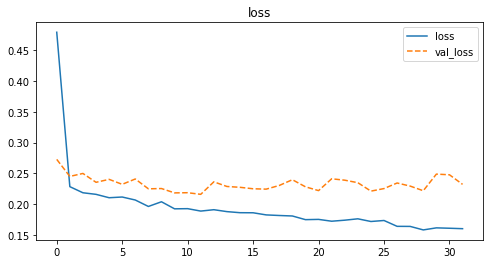

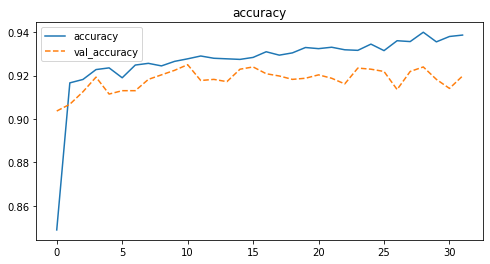

In [17]:
model_NN1.save("bean_model_.h5")
# Loss
fig, ax = plt.subplots(figsize=(8,4))
plt.title('loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()
plt.show()

# Accuracy
fig, ax = plt.subplots(figsize=(8,4))
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.legend()
plt.show()

# bagging

### NN bagging

In [18]:
x_bag = train_full.iloc[:, :-1]
y_bag = train_full.iloc[:, -1]
x_bagging = x_bag

scaler = StandardScaler()
x_bag_norm = scaler.fit_transform(x_bag)

predict_bag = model_NN1.predict(x_bag_norm)
predict_bag = np.argmax(predict_bag, axis=1)

x_bagging.insert(x_bagging.shape[1], 'bagging_NN', predict_bag)

300/300 [==============================] - 1s 2ms/step


### SVM bagging

In [19]:
x_bag = train_full.iloc[:, :-1]
y_bag = train_full.iloc[:, -1]

bag_SVM1 = model_SVM1.predict(x_bag)
bag_SVM2 = model_SVM2.predict(x_bag)

x_bagging.insert(x_bagging.shape[1], 'bagging_SVM1', bag_SVM1)
x_bagging.insert(x_bagging.shape[1], 'bagging_SVM2', bag_SVM2)

### fit NN2(寬的)

In [20]:
x_bag_train, x_bag_test, y_bag_train, y_bag_test = train_test_split(x_bagging, y, test_size=0.2, random_state=1234)

scaler = StandardScaler()
x_bag_train = scaler.fit_transform(x_bag_train)
x_bag_test = scaler.transform(x_bag_test)

In [21]:
# del model
model_NN2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=512, input_shape=(x_bag_train.shape[1],), activation='elu'),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=8, activation='softmax')
])

model_NN2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_NN2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               10240     
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
Total params: 84,680
Trainable params: 84,680
Non-trainable params: 0
_________________________________________________________________


In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model_NN2.fit(
    x_bag_train, y_bag_train,
    validation_data=(x_bag_test, y_bag_test),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
)

Epoch 1/100
120/120 [==============================] - 1s 6ms/step - loss: 1.0467 - accuracy: 0.7774 - val_loss: 0.6407 - val_accuracy: 0.8453
Epoch 2/100
120/120 [==============================] - 1s 5ms/step - loss: 0.4912 - accuracy: 0.8822 - val_loss: 0.4035 - val_accuracy: 0.9052
Epoch 3/100
120/120 [==============================] - 1s 5ms/step - loss: 0.3370 - accuracy: 0.9102 - val_loss: 0.3127 - val_accuracy: 0.9146
Epoch 4/100
120/120 [==============================] - 1s 6ms/step - loss: 0.2799 - accuracy: 0.9117 - val_loss: 0.2812 - val_accuracy: 0.9167
Epoch 5/100
120/120 [==============================] - 1s 5ms/step - loss: 0.2571 - accuracy: 0.9140 - val_loss: 0.2675 - val_accuracy: 0.9182
Epoch 6/100
120/120 [==============================] - 1s 6ms/step - loss: 0.2455 - accuracy: 0.9143 - val_loss: 0.2598 - val_accuracy: 0.9172
Epoch 7/100
120/120 [==============================] - 1s 6ms/step - loss: 0.2387 - accuracy: 0.9160 - val_loss: 0.2540 - val_accuracy: 0.9161

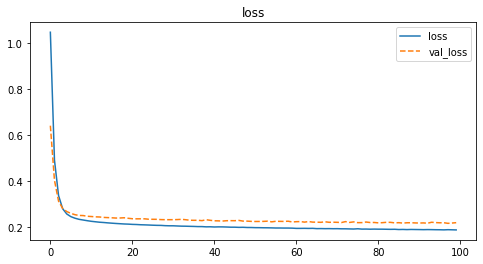

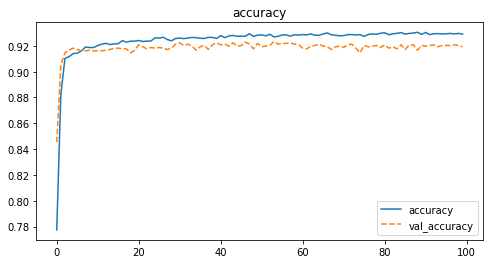

In [23]:
model_NN2.save("bean_model_bagging1.h5")
# Loss
fig, ax = plt.subplots(figsize=(8,4))
plt.title('loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()
plt.show()

# Accuracy
fig, ax = plt.subplots(figsize=(8,4))
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.legend()
plt.show()

### fit NN2(深的)

In [24]:
# del model
model_NN3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=128, input_shape=(x_bag_train.shape[1],), activation='elu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=8, activation='softmax')
])

model_NN3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_NN3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2560      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
Total params: 18,376
Trainable params: 18,376
Non-trai

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model_NN3.fit(
    x_bag_train, y_bag_train,
    validation_data=(x_bag_test, y_bag_test),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
)

Epoch 1/100
120/120 [==============================] - 1s 4ms/step - loss: 1.4847 - accuracy: 0.5803 - val_loss: 0.9987 - val_accuracy: 0.7375
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.8283 - val_loss: 0.4960 - val_accuracy: 0.8875
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8992 - val_loss: 0.3665 - val_accuracy: 0.9026
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.9106 - val_loss: 0.3101 - val_accuracy: 0.9125
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.9143 - val_loss: 0.2822 - val_accuracy: 0.9135
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2519 - accuracy: 0.9155 - val_loss: 0.2674 - val_accuracy: 0.9146
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9188 - val_loss: 0.2587 - val_accuracy: 0.9130

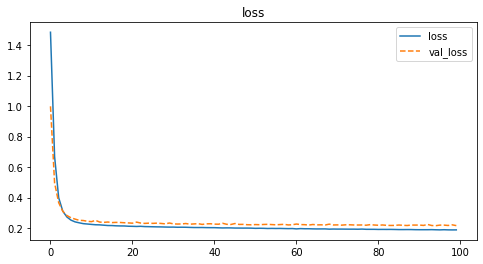

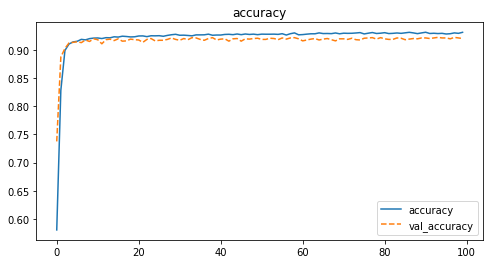

In [26]:
model_NN3.save("bean_model_bagging2.h5")
# Loss
fig, ax = plt.subplots(figsize=(8,4))
plt.title('loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()
plt.show()

# Accuracy
fig, ax = plt.subplots(figsize=(8,4))
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.legend()
plt.show()

# 生成答案

In [27]:
test_bag = test

scaler = StandardScaler()
test_bag_norm = scaler.fit_transform(test_bag)

test_predict_bag = model_NN1.predict(test_bag_norm)
test_predict_bag = np.argmax(test_predict_bag, axis=1)

test_SVM1 = model_SVM1.predict(test_bag)
test_SVM2 = model_SVM2.predict(test_bag)

test_bag.insert(test_bag.shape[1], 'bagging_SVM1', test_SVM1)
test_bag.insert(test_bag.shape[1], 'bagging_SVM2', test_SVM2)
test_bag.insert(test_bag.shape[1], 'bagging_NN', test_predict_bag)

86/86 [==============================] - 0s 1ms/step


In [28]:
scaler = StandardScaler()
test_bag = scaler.fit_transform(test_bag)

test_predict = model_NN3.predict(test_bag)
test_predict = np.argmax(test_predict, axis=1)
predict = []
for i in range(len(test_predict)):
  if(test_predict[i]==1): predict.append('DERMASON')
  elif(test_predict[i]==2): predict.append('SIRA') 
  elif(test_predict[i]==3): predict.append('SEKER') 
  elif(test_predict[i]==4): predict.append('HOROZ') 
  elif(test_predict[i]==5): predict.append('CALI') 
  elif(test_predict[i]==6): predict.append('BARBUNYA') 
  else: predict.append('BOMBAY') 

86/86 [==============================] - 1s 5ms/step


In [29]:
test_label = pd.DataFrame()
test_label["data_id"] = np.arange(1, len(predict)+1)
test_label["Class"] = predict
test_label = test_label.sort_values(by='data_id')
test_label.to_csv('NN_HW4_3.csv', index=False)